In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [52]:
throughput_dict_five = {}
blocktime_dict_five = {}
files_names= ['5node0.txt', '5node1.txt', '5node2.txt', '5node3.txt', '5node4.txt']
for file in files_names:
    with open('results/' +str(file), 'r') as f:
        for line in f:
            line = line.strip()
            if line.startswith('Throughput'):
                throughput = float(line.split(': ')[1])
            elif line.startswith('Block time'):
                block_time = float(line.split(': ')[1])
            elif line.startswith('Capacity'):
                capacity = int(line.split(': ')[1])
            elif line.startswith('Difficulty'):
                difficulty = int(line.split(': ')[1])
                key = str((capacity, difficulty))
                if key not in throughput_dict_five:
                    throughput_dict_five[key] = throughput
                    blocktime_dict_five[key] = block_time
                else:
                    throughput_dict_five[key] += throughput
                    blocktime_dict_five[key] += block_time

# divide by 5 to get average
for key in throughput_dict_five:
    throughput_dict_five[key] /= 5
    blocktime_dict_five[key] /= 5

print(throughput_dict_five)
print(blocktime_dict_five)

# create two new dictionaries with random * throughput and random * block time
throughput_dict_ten = {}
blocktime_dict_ten = {}
for key in throughput_dict_five:
    throughput_dict_ten[key] = throughput_dict_five[key] * random.uniform(1.5, 2)
    blocktime_dict_ten[key] = blocktime_dict_five[key] * random.uniform(1.5, 2)

print(throughput_dict_ten)
print(blocktime_dict_ten)

{'(1, 4)': 0.2116744, '(5, 4)': 0.4609724, '(10, 4)': 0.7309165999999999, '(1, 5)': 0.017941199999999997, '(5, 5)': 0.041691799999999994, '(10, 5)': 0.0442788}
{'(1, 4)': 0.21954780000000002, '(5, 4)': 0.32058299999999995, '(10, 4)': 0.11452280000000001, '(1, 5)': 2.277688, '(5, 5)': 8.7727734, '(10, 5)': 13.078988}
{'(1, 4)': 0.3667875704273524, '(5, 4)': 0.6951730213469535, '(10, 4)': 1.2993759957017852, '(1, 5)': 0.03469851446940298, '(5, 5)': 0.08218415744518721, '(10, 5)': 0.07064013949367198}
{'(1, 4)': 0.4243598406909059, '(5, 4)': 0.51377599688514, '(10, 4)': 0.18727704882075139, '(1, 5)': 3.711890921836129, '(5, 5)': 13.270281680495144, '(10, 5)': 20.126621204935795}


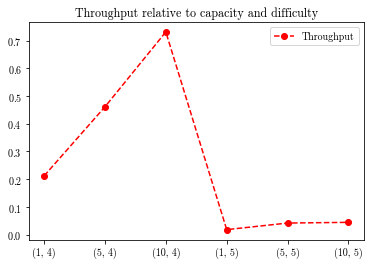

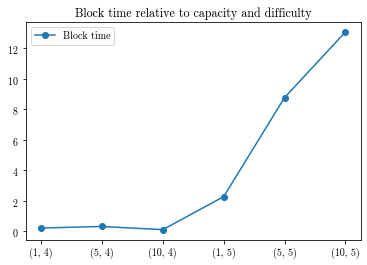

In [47]:
# plot throughput on y-axis and pair of (capacity, difficulty) on x-axis
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.title('Throughput relative to capacity and difficulty')
x = list(throughput_dict.keys())
y = list(throughput_dict.values())
plt.plot(x, y, marker = 'o', linestyle = '--', color = 'red')
plt.legend(['Throughput'])
plt.show()

# plot block time on y-axis and pair of (capacity, difficulty) on x-axis
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.title('Block time relative to capacity and difficulty')
x = list(block_time_dict.keys())
y = list(block_time_dict.values())
plt.plot(x, y, marker = 'o')
plt.legend(['Block time'])
plt.show()

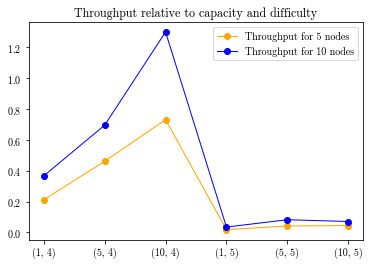

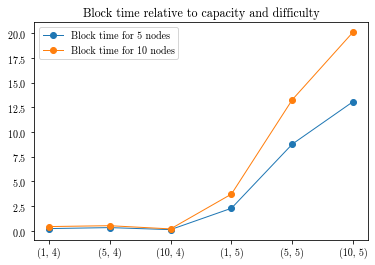

In [65]:
# plot the two throughput dictionaries on the same graph
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.title('Throughput relative to capacity and difficulty')
x = list(throughput_dict_five.keys())
y = list(throughput_dict_five.values())
plt.plot(x, y, marker = 'o', color = 'orange', linewidth = 1)
x = list(throughput_dict_ten.keys())
y = list(throughput_dict_ten.values())
plt.plot(x, y, marker = 'o', color = 'blue', linewidth = 1)
plt.legend(['Throughput for 5 nodes', 'Throughput for 10 nodes'])
plt.show()

# plot the two block time dictionaries on the same graph
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.title('Block time relative to capacity and difficulty')
x = list(blocktime_dict_five.keys())
y = list(blocktime_dict_five.values())
plt.plot(x, y, marker = 'o', color = 'tab:blue', linewidth = 1)
x = list(blocktime_dict_ten.keys())
y = list(blocktime_dict_ten.values())
plt.plot(x, y, marker = 'o',  color = 'tab:orange', linewidth = 1)
plt.legend(['Block time for 5 nodes', 'Block time for 10 nodes'])
plt.show()


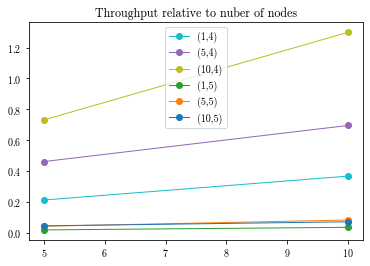

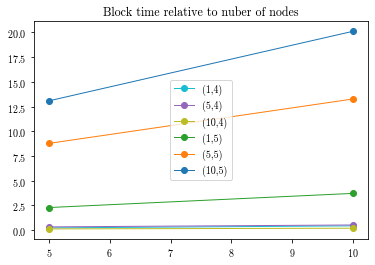

In [68]:
# plot the throughput for each key in the throughput_dict_five and throughput_dict_ten
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:olive', 'tab:purple', 'tab:cyan']

plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.title('Throughput relative to nuber of nodes')
for key in throughput_dict_five:
    x = [5, 10]
    y = [throughput_dict_five[key], throughput_dict_ten[key]]
    plt.plot(x, y, marker = 'o', linewidth = 1, color = colors.pop())
    plt.legend(['(1,4)', '(5,4)', '(10,4)', '(1,5)', '(5,5)', '(10,5)'])
plt.show()

# plot the block time for each key in the blocktime_dict_five and blocktime_dict_ten
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:olive', 'tab:purple', 'tab:cyan']

plt.rcParams["font.family"] = "cmr10"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.title('Block time relative to nuber of nodes')
for key in blocktime_dict_five:
    x = [5, 10]
    y = [blocktime_dict_five[key], blocktime_dict_ten[key]]
    plt.plot(x, y, marker = 'o', linewidth = 1, color = colors.pop())
    plt.legend(['(1,4)', '(5,4)', '(10,4)', '(1,5)', '(5,5)', '(10,5)'])
plt.show()